### Background & Context

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

 

### Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Bank?

### Load Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Loading and Exploring Data

In [4]:
data = pd.read_csv("Loan_Modelling.csv")

In [5]:
df = data.copy()#making a copy of the data

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string
df.sample(n=10)

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1297,1298,61,35,90,95814,4,1.9,2,0,0,0,0,1,0
2859,2860,35,11,188,94596,1,0.9,3,282,1,0,0,1,0
3192,3193,65,39,35,94005,1,0.5,3,0,0,0,0,0,0
2965,2966,53,27,31,91605,2,0.4,3,104,0,0,0,0,1
4596,4597,37,13,61,95131,3,2.8,1,0,0,0,0,0,0
4853,4854,45,19,41,91109,1,0.2,1,0,0,0,0,1,0
3213,3214,39,9,32,90212,3,2.0,3,116,0,0,0,1,0
274,275,30,5,74,95616,4,2.2,1,0,0,1,0,0,1
2234,2235,36,12,35,95812,4,0.4,2,0,0,0,0,1,0
464,465,43,19,83,94305,4,3.6,3,0,1,0,0,0,1


ID is just an index for the data entry. This column will not be a significant factor in determining if the customer will purchase the loan
There are information represented as 0 or 1 for many columns.We need to see if these need to be handled or not

In [7]:
# lets look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We have one column CCAvg(Avg credit card spending) as float datatype .Rest of the columns are of int datatype

In [8]:
# Summary of dataset
df.describe(include='all')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Observations:
* We can see that mean age of the customer is 45 years and max age is 63.
* We can see negative value for experience which is not a possible scenario.Also we see max experience of 43 years .Need to explore more here
* We can see a large difference in the min and max Income.Need to see if we can classify customers based on income.
* Average Family has 2 people
* Most of the people has not taken a personal loan.**Peronal Loan is our target variable**


In [9]:
# Check for missing values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no NaN (missing values) in any of the columns

### Data Preprocessing

1.Experience :We saw earlier that Experience column had negative numbers.Let us look at a sample of this column

In [10]:
neg_exp = df[df['Experience']<0]# looking at the sample of data
neg_exp.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
2545,2546,25,-1,39,94720,3,2.40,2,0,0,0,0,1,0
649,650,25,-1,82,92677,4,2.10,3,0,0,0,0,1,0
1905,1906,25,-1,112,92507,2,2.00,1,241,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
2466,2467,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
3076,3077,29,-1,62,92672,2,1.75,3,0,0,0,0,0,1
4116,4117,24,-2,135,90065,2,7.20,1,0,0,0,0,1,0


Lets determine the age of the customers whose experience is in negative years

In [11]:
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

Based on the customer age and the experiece listed, it seems appropriate to just remove the - sign from their number of years of experience

In [12]:
df['Experience'] = df['Experience'].abs()# removing negative values and getting abosulte values for the experience column

In [13]:
converted_exp = df[df['Experience']<0]# Examing column after converting experience years to absolute values
converted_exp.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


We now donot have any rows with negative experience

### Find Unique values in the data

In [14]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

We can convert the columns into continous and categorical data based on the number of unique values in each column

In [15]:
categorical_variables=[col for col in df.columns if df[col].nunique()<=5]
print('Categorical Variables',categorical_variables)
continuous_variables=[col for col in df.columns if df[col].nunique()>5]
print('Continous Variables',continuous_variables)

Categorical Variables ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
Continous Variables ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


We can remove ID from our list of continous variables since its just represents the id of the data

In [16]:
continuous_variables.remove('ID')
print(continuous_variables)

['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


#### Let us analyse the different levels in the categorical variables

In [17]:
for col in df.columns:
    if df[col].nunique()<=5:
        unique_value = df[col].unique() # extracting unique values from each category column
        print(col,unique_value)
     

Family [4 3 1 2]
Education [1 2 3]
Personal_Loan [0 1]
Securities_Account [1 0]
CD_Account [0 1]
Online [0 1]
CreditCard [0 1]


All values seems to be appropriate for each of the categorical columns

## Exploratory Data Analysis

### Univariate Analysis

#### Analysis of Continuous Variables

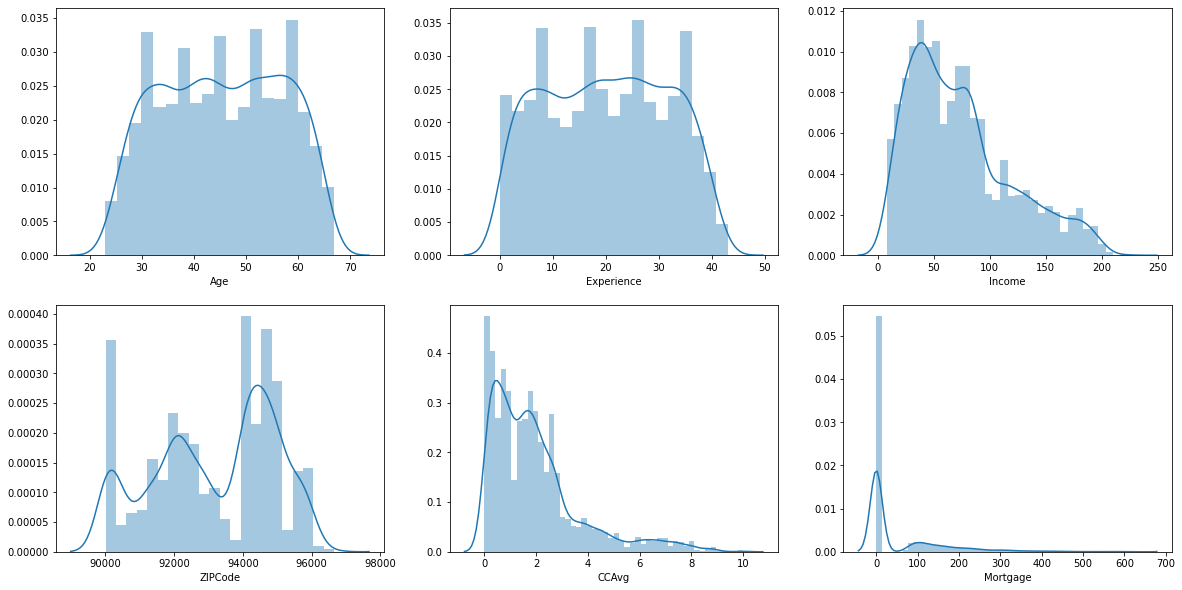

In [18]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])
 

Observation:
* We can see that Age and Experience are uniformly distubuted
* Income,CCAvg,Mortgage are positively skewed
* Zipcode is distributed across different regions
* Mortgage contains mostly zeros
    

#### Analysis of Categorical Variables

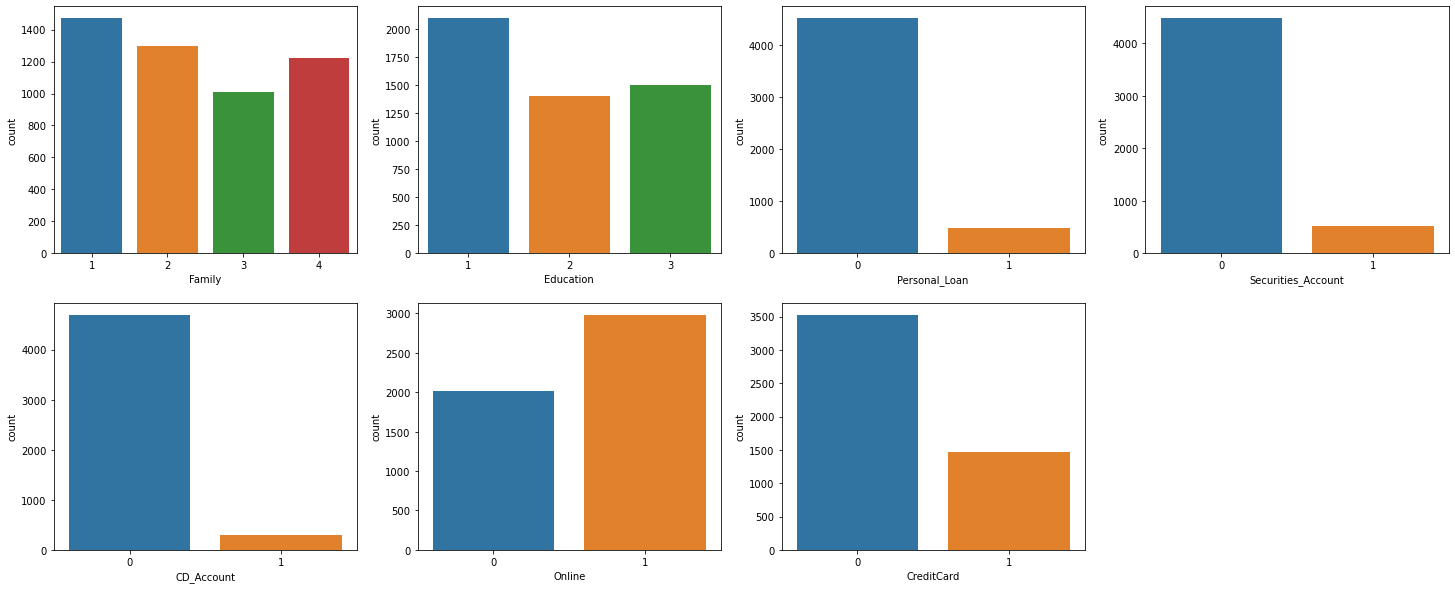

In [19]:
fig=plt.figure(figsize=(25,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(df[col])

Observations:
* Most of the customers are Undergrads and have family size one
* Only a few customers have availed the personal loan in the previous campaign
* Majority of the customers do not have a Securities_Account,CD_Account and Credit Card
* Majority of customers use internet banking facilities

### Bivariate Analysis 

Let us analyse each independent variable w.r.t the dependant variable personal_loan

**Analysing Continuous Variables with personal_loan**

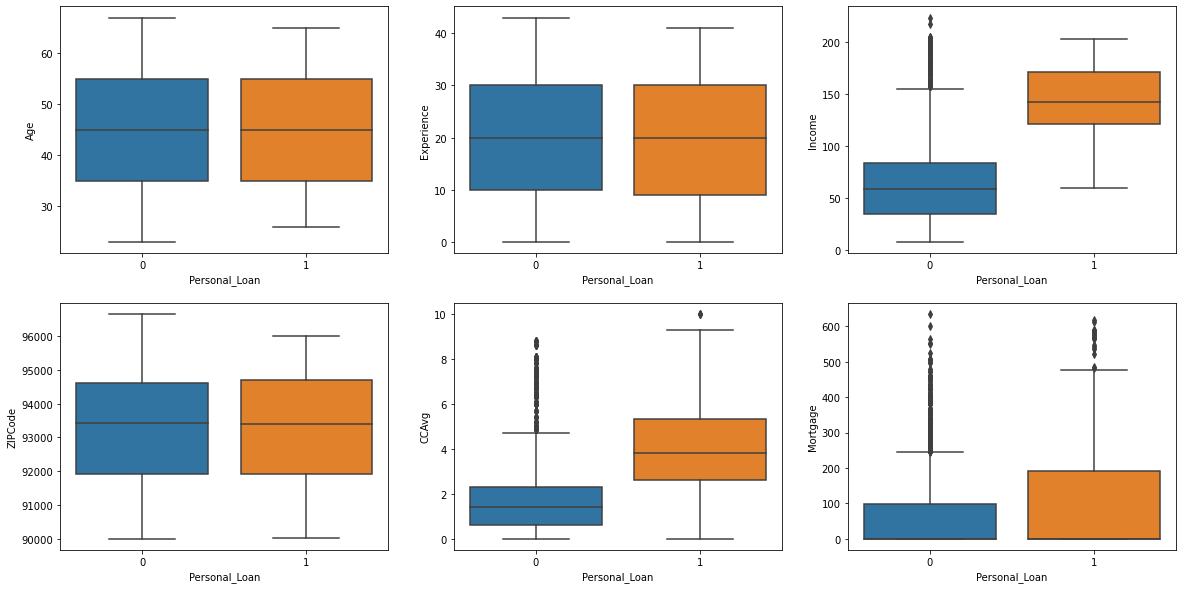

In [20]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df[col],x=df['Personal_Loan'])

Observations:
* We can see that there is not much variation in the Age and Experience of the customers who are availing personal_loan.That means customers of all ages and with different years of experience are equally availing the loans
* We can see that customers having higher Income have better chances of accepting the loan offered
* Customers having higher spending on Credit cards have availed loans
* Customers from all most of the zipcodes have availed loans.So its not concentrated in a single region

**Analysing Categorical Variables with personal_loan**

Let us remove the dependant variable personal loan from the Categorical Variables list

In [21]:
categorical_variables.remove("Personal_Loan")
print(categorical_variables)

['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


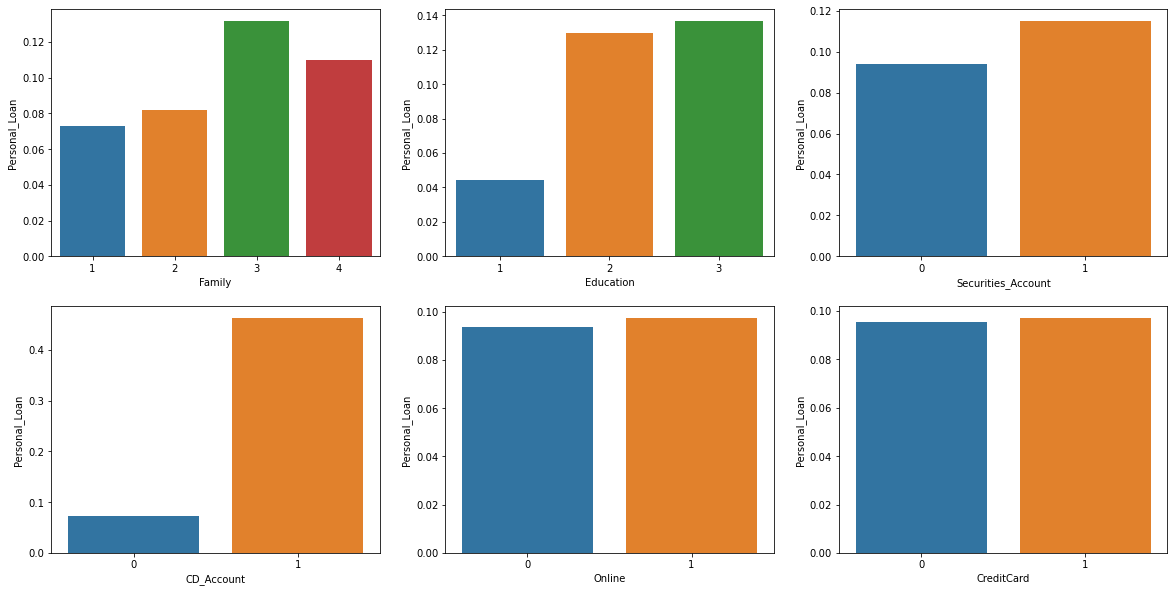

In [22]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal_Loan',data=df,ci=None)

Observations:
* Family having 3 members have better chances of availing the loan when offered
* Customers who are having graduate and Advanced/Professional degree have better chance of accepting the loan than customers who are
undergraduates
* Customers who have Securities_Account and CD_Accounts have more chance of accepting the personal loan offered
* Using Internet banking or having a credit card does not increase the chance of accepting personal loan offered

### Multivariate Analysis

**Income and CCAvg are two attributes which effects the chances of taking a personal Loan.So lets anaylse the relationship between these variables and other independant variables and Personal_Loan variable**

#### Analysing Income with other variables

In [23]:
con=continuous_variables.copy()
con.remove('Income')

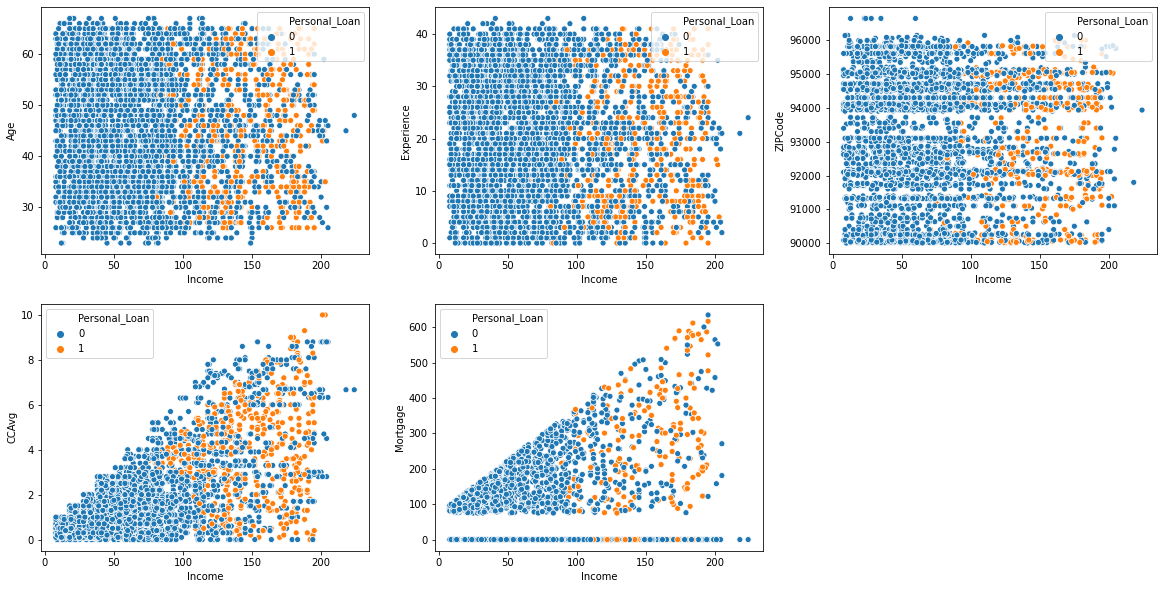

In [24]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal_Loan',data=df)

Observations:
* No of years of experience ,Age and zipcode wrt Income show similar patterns for customers who has availed personal loan or not
* Customers with high CCAVG spending seems to have accepted loan offer
* Customers with higher mortgage values also have accepted loan offer


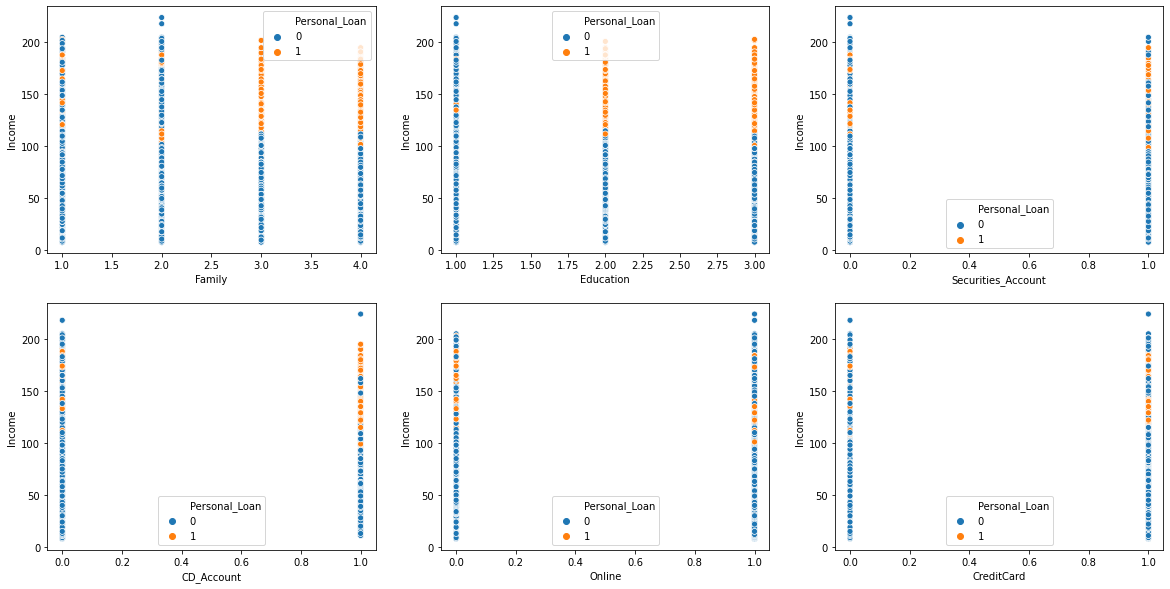

In [25]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'Income',hue='Personal_Loan',data=df)

Observations:
* We can see some outliers w.r.t to income for customers who are undergraduates
    

#### Analysing CCAvg with other variables

In [26]:
con.remove('CCAvg')

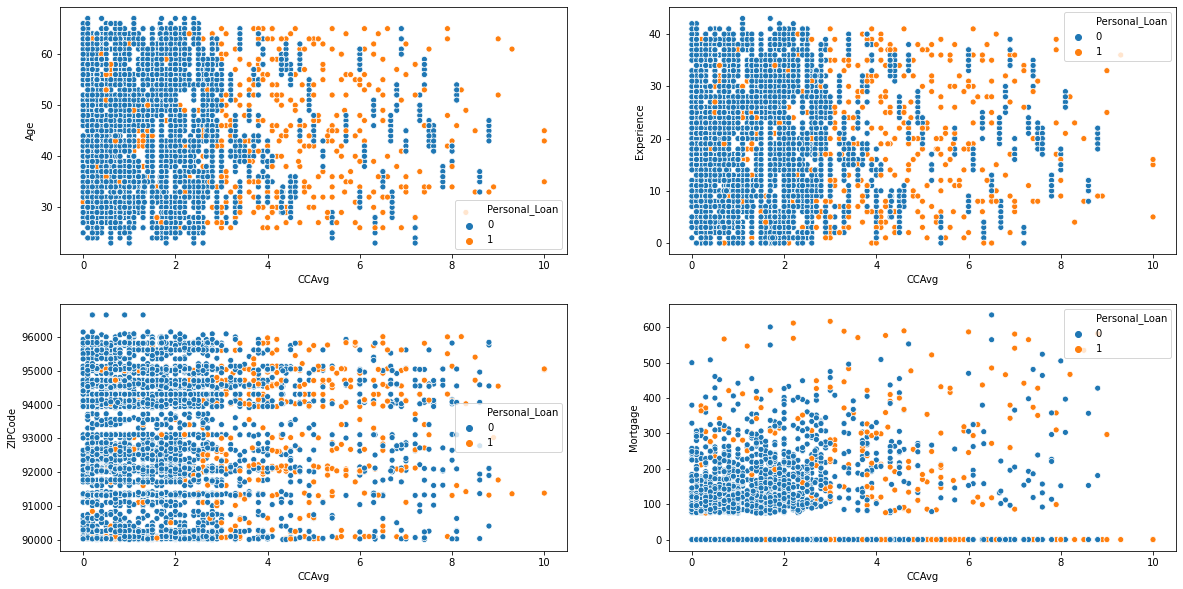

In [27]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal_Loan',data=df)

Observations:
* Age and Experience show same patterns on customers with personal loan or not.
* High CCAvg and Mortgage have more chances of customer having Personal Loan
    

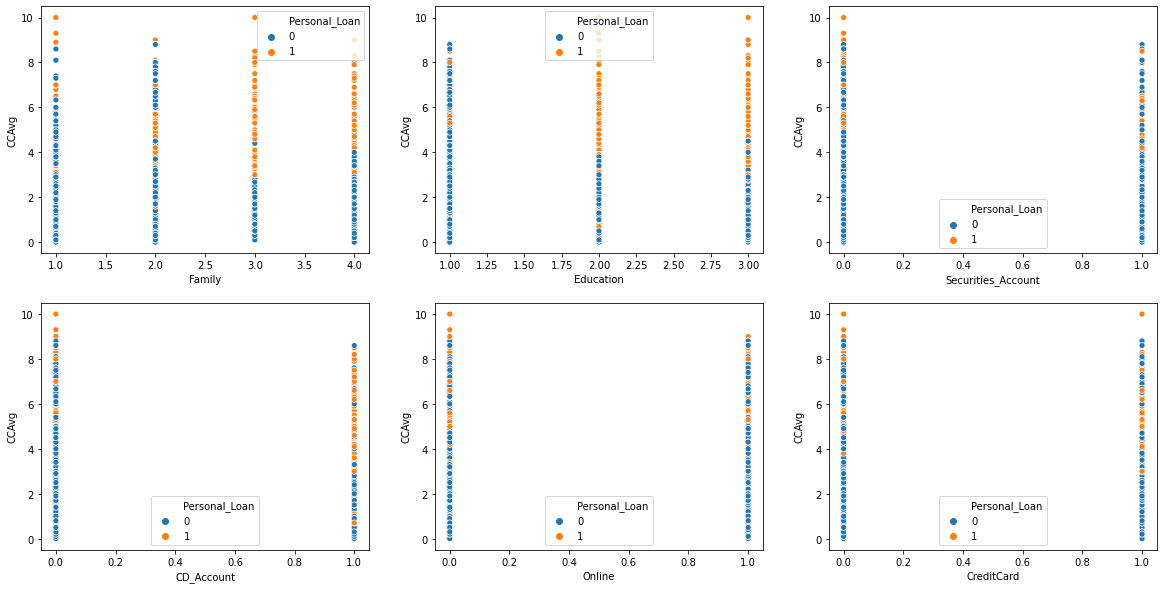

In [28]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'CCAvg',hue='Personal_Loan',data=df)

Observations:
We can see similar trends for CCAvg as with Income for categorical variables


### Insights Based on EDA

* We can see that there is not much variation in the Age and Experience of the customers who are availing personal_loan.That means customers of all ages and with different years of experience are equally availing the loans
* We can see that customers having higher Income have better chances of accepting the loan offered
* Customers having higher spending on Credit cards have availed loans
* Family having 3 members have better chances of availing the loan when offered
* Customers who are having graduate and Advanced/Professional degree have better chance of accepting the loan than customers who are undergraduates
* Customers who have Securities_Account and CD_Accounts have more chance of accepting the personal loan offered
* Using Internet banking or having a credit card does not increase the chance of accepting personal loan offered
* Customers with higher mortgage values also have accepted loan offer


### Determining if there are duplicate values in the data

In [29]:
df.duplicated().sum()

0

We donot have any duplicates in the data set

## Lets look at outliers in every numerical column

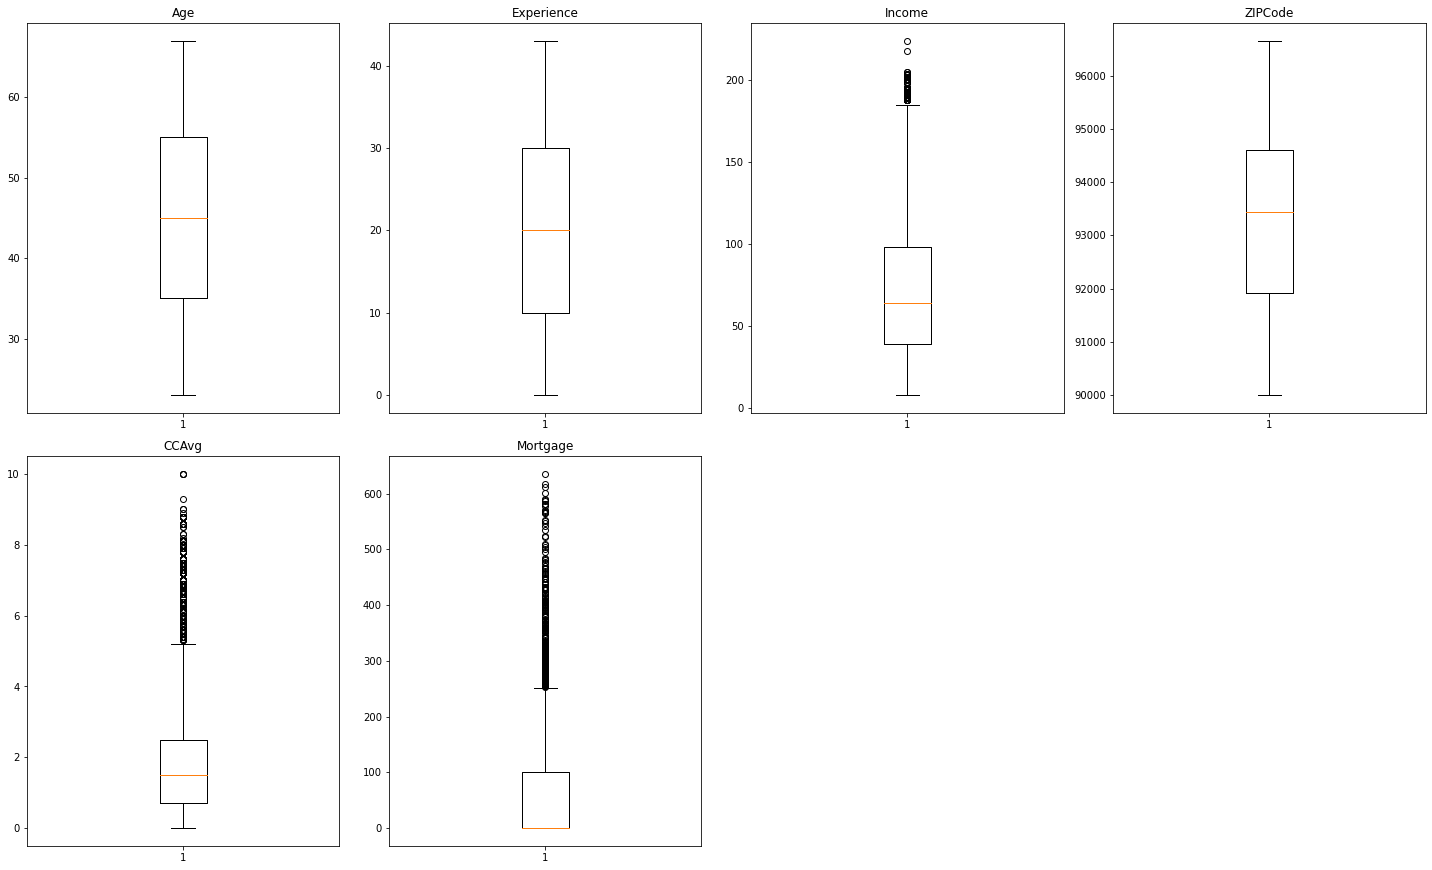

In [30]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(continuous_variables):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Income ,CCAvg and Mortgage variables have upper outlier values.Let us analyse these outlier value to decide if they need to be treated
* Other variables donot have outliers

In [31]:
# Check Income extreme values
df.sort_values(by=["Income"],ascending = False).head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
526,527,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2988,2989,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,4226,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
677,678,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
2278,2279,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
3804,3805,47,22,203,95842,2,8.80,1,0,0,0,0,1,0
2101,2102,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
787,788,45,15,202,91380,3,10.00,3,0,1,0,0,0,0


Based on Age and Experience the Outliers values in the Income variable looks fine.

In [32]:
# Check CCAvg extreme values
df.sort_values(by=["CCAvg"],ascending = False).head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
787,788,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
2101,2102,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
2337,2338,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
3943,3944,61,36,188,91360,1,9.3,2,0,1,0,0,0,0
3822,3823,63,33,178,91768,4,9.0,3,0,1,0,0,0,0
1339,1340,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
2769,2770,33,9,183,91320,2,8.8,3,582,1,0,0,1,0
2447,2448,44,19,201,95819,2,8.8,1,0,0,0,0,1,1
917,918,45,20,200,90405,2,8.8,1,0,0,0,0,1,1


Based on Age,Experience and Income the CCAvg values looks to be fine

In [33]:
# Check Mortgage extreme values
df.sort_values(by=["Mortgage"],ascending = False).head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2934,2935,37,13,195,91763,2,6.5,1,635,0,0,0,1,0
303,304,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
4812,4813,29,4,184,92126,4,2.2,3,612,1,0,0,1,0
1783,1784,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
4842,4843,49,23,174,95449,3,4.6,2,590,1,0,0,0,0
1937,1938,51,25,181,95051,1,3.3,3,589,1,1,1,1,0
782,783,54,30,194,92056,3,6.0,3,587,1,1,1,1,1
2769,2770,33,9,183,91320,2,8.8,3,582,1,0,0,1,0
4655,4656,33,7,188,95054,2,7.0,2,581,1,0,0,0,0
4345,4346,26,1,184,94608,2,4.2,3,577,1,0,1,1,1


Mortgage values also look to be fine and we will not treat these outliers for now.

### Correlation Plot

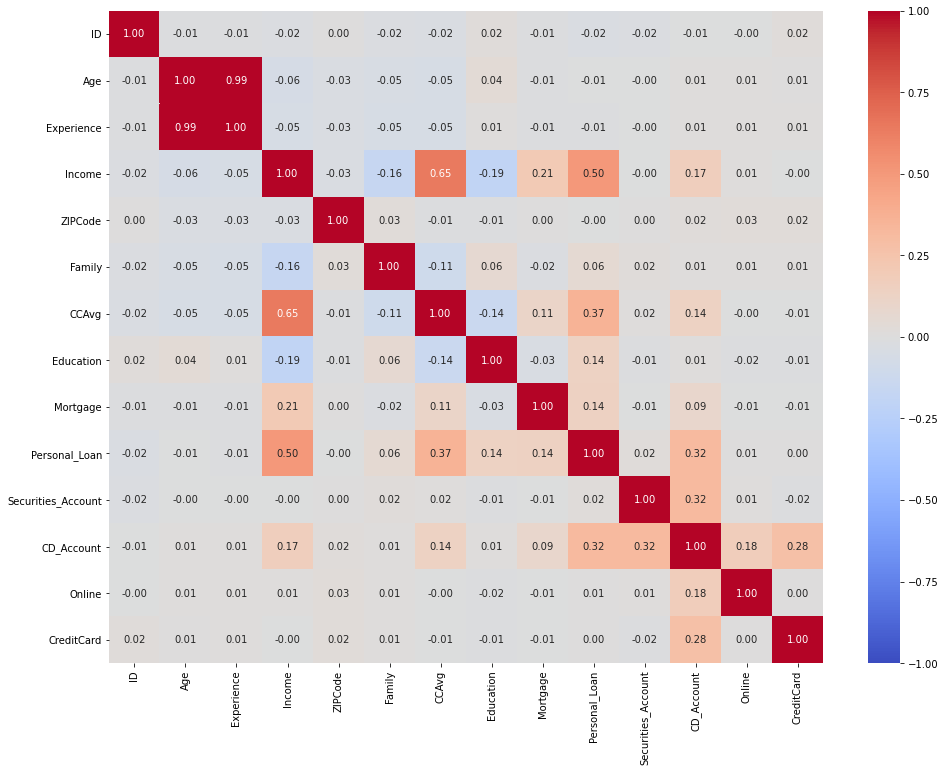

In [34]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

* Age and Experience are highly correlated with each other .We would need to remove one of these variables from our model.
* Personal_Loan has positive correlation with Income & CCAvg
* Also CCAvg & Income have positve correlation with each other.

In [35]:
# converting categorical varaible to category type
for colmn in categorical_variables:
    df[colmn] = df[colmn].astype('category')

In [36]:
df["Personal_Loan"] = df["Personal_Loan"].astype("category")

In [37]:
#Fixing Datatypes for Model building
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.5 KB


### Feature Engineering

#### Income Variable

In [38]:
# We will create a new variable Income Category by binning the Income 
# Create a new variable - Income Category
df1 = df.copy()
df1["Income_category"] = pd.cut(
    x=df["Income"],
    bins=[0, 39, 98, 224],
    labels=["Low_Income", "Median_Income", "High_Income"],
)


# Drop the Income columns.
df1.drop(columns=["Income"], axis=1, inplace=True)

#### CCAvg Variable

In [39]:
# We will create a new variable CCAvg Category by binning the CCAvg numbers
# Create a new variable - CCAvg Category

df1["CCAvg_category"] = pd.cut(
    x=df["CCAvg"],
    bins=[0.000000, 0.700000, 2.500000, 10.000000],
    labels=["Low_CCSpending", "Median_CCSpending", "High_CCSpending"],
)


# Drop the CCAvg columns.
df1.drop(columns=["CCAvg"], axis=1, inplace=True)

## Model Building 

## Logistic Regression Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a Logistic regression on the train data.
4. Remove multicollinearity and insignificant variables, if any
5. Choose optimal threshold, if required.
6. Test the data on test set.

### Model evaluation criterion

### **What does a bank want? Bank could face 2 types of situations**
1. Target customers who do not end up taking Personal Loans - Loss of resources
2. Not targeting potential customers who may take Personal Loan - Loss of opportunity to earn more through interest on Loans

### Which Loss is greater ? 
* Not targeting potential customers who may take Personal Loan i.e. False Negatives i.e Predicting a customer will not take loan, while in actual the customer will take the loan 

### Since we want to reduce loss of opportunity, we should use Recall as a metric of model evaluation 
* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of not targeting customers who may take loan

### Logistic Regression using sklearn

In [40]:
## Defining X and Y variables
X = df1.drop(['Personal_Loan'], axis=1)
Y = df1[['Personal_Loan']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30)

In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=1)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

### Let's look at Model Performances

#### Prediction on train

In [42]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual-Yes","Actual-No"]],
                  columns = [i for i in ['Predicted-Yes','Predicted-No']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

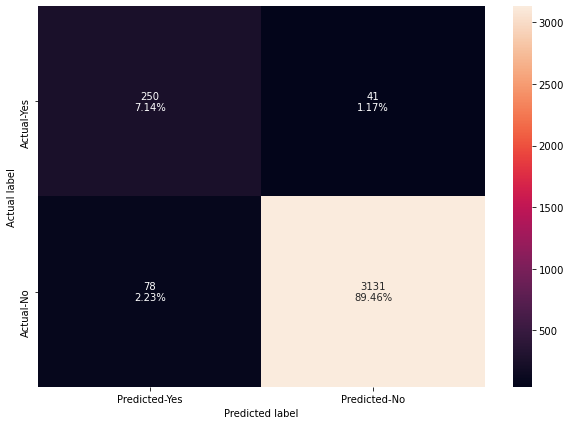

In [43]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

confusion matrix = 



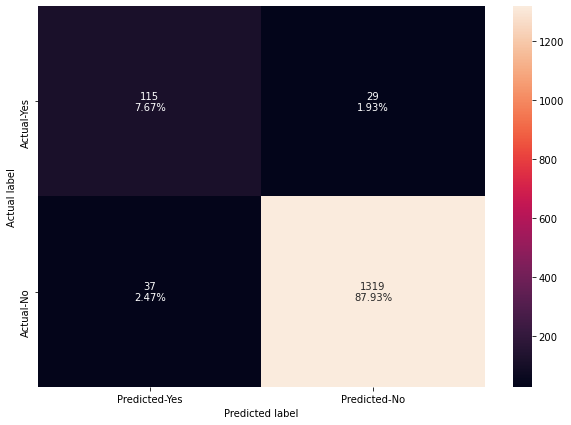

In [44]:
#Predict for test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [45]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Accuracy on train data: 0.966
Accuracy on test data: 0.956
Recall on train data: 0.7621951219512195
Recall on test data: 0.756578947368421


### AUC ROC Curve

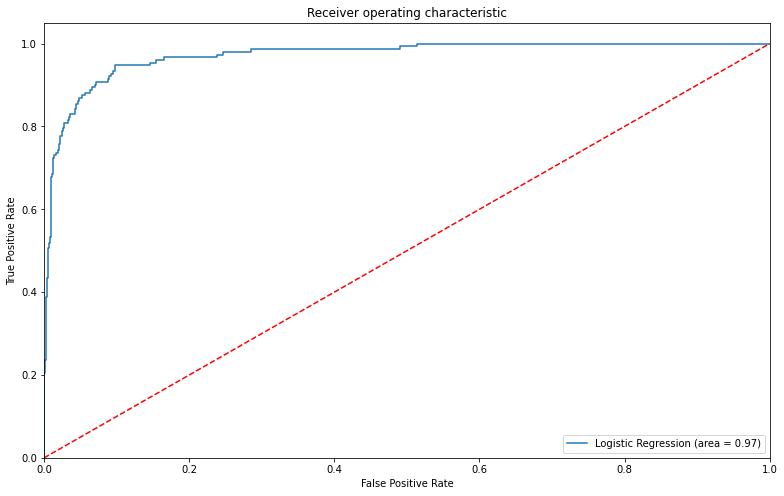

In [46]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Optimal Threshold

In [47]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.0793482437192151


In [48]:
target_names = ['Accepted Personal Loan', 'Rejected Personal Loan']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

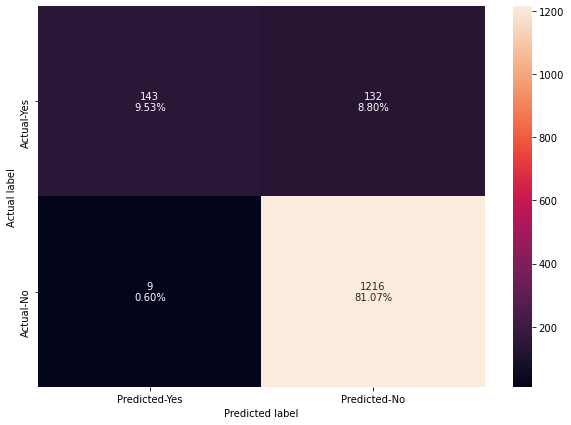

In [49]:
make_confusion_matrix(y_test,y_pred_ts)

In [50]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Accuracy on train data: 0.9108571428571428
Accuracy on test data: 0.906
Recall on train data: 0.7621951219512195
Recall on test data: 0.756578947368421


**Observation**
* After using optimal threshold we see that true positives have increased from 7 % to 8.80%. and false positive has decreased from 2.53% to 0.73%



### Check for Multicollinearity

## Let us ensure that Multicollinearity doesn't exist

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [51]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [52]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                               3261.205030
ID                                     1.003228
Age                                   90.144472
Experience                            90.001412
ZIPCode                                1.006048
Mortgage                               1.040677
Family_2                               1.402719
Family_3                               1.404094
Family_4                               1.437870
Education_2                            1.298291
Education_3                            1.336708
Securities_Account_1                   1.138846
CD_Account_1                           1.342617
Online_1                               1.041725
CreditCard_1                           1.111077
Income_category_Median_Income          1.689526
Income_category_High_Income            2.241930
CCAvg_category_Median_CCSpending       1.578058
CCAvg_category_High_CCSpending         2.026928
dtype: float64



Age and Experience has high VIFs. Lets drop one of these variables

In [53]:
# dropping variables of perfect collinearity
num_feature_set = num_feature_set.drop('Experience', axis=1)

In [54]:
vif_series2 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                               2861.238516
ID                                     1.003166
Age                                    1.012626
ZIPCode                                1.006022
Mortgage                               1.040666
Family_2                               1.402718
Family_3                               1.398325
Family_4                               1.437529
Education_2                            1.285218
Education_3                            1.262660
Securities_Account_1                   1.138654
CD_Account_1                           1.342087
Online_1                               1.041712
CreditCard_1                           1.111073
Income_category_Median_Income          1.688844
Income_category_High_Income            2.237260
CCAvg_category_Median_CCSpending       1.572030
CCAvg_category_High_CCSpending         2.020902
dtype: float64



Now none of the variables exibit high multicollinearity

### Build the logistic regression model from statsmodels

In [55]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30,random_state=1)

In [56]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

         Current function value: 0.095810
         Iterations: 35


C:\Users\sandh\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [57]:
print(lg.summary())
# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3482
Method:                           MLE   Df Model:                           17
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                  0.6939
Time:                        19:39:02   Log-Likelihood:                -335.33
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -29.5528   6733.370     -0.004      0.996   -1.32e+04    1.32e+04
ID                               -6.571e-05   7.28e-05     -0.902

We can see that a number of variables like ID,ZIPCode,Family_2 has high p-value .Lets drop them one by one

### Drop insignificant variables

In [58]:
#Income_category_Median_Income has highest p values among those with p-value greater than 0.05
X_train1 = X_train.drop('Income_category_Median_Income', axis =1)
X_test1 = X_test.drop('Income_category_Median_Income',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.097229
         Iterations 9
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.689   
Dependent Variable:        Personal_Loan          AIC:                    714.6059
Date:                      2021-01-29 19:39       BIC:                    819.3347
No. Observations:          3500                   Log-Likelihood:         -340.30 
Df Model:                  16                     LL-Null:                -1095.5 
Df Residuals:              3483                   LLR p-value:            0.0000  
Converged:                 1.0000                 Scale:                  1.0000  
No. Iterations:            9.0000                                                 
----------------------------------------------------------------------------------
                                  Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------

* No change in Precision or Recall lets drop Zipcode now

In [59]:
#ZipCode has highest p values among those with p-value greater than 0.05
X_train2 = X_train1.drop(['ZIPCode'], axis =1)
X_test2 = X_test1.drop(['ZIPCode'],axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.097230
         Iterations 10
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.689   
Dependent Variable:        Personal_Loan          AIC:                    712.6111
Date:                      2021-01-29 19:39       BIC:                    811.1794
No. Observations:          3500                   Log-Likelihood:         -340.31 
Df Model:                  15                     LL-Null:                -1095.5 
Df Residuals:              3484                   LLR p-value:            0.0000  
Converged:                 1.0000                 Scale:                  1.0000  
No. Iterations:            10.0000                                                
----------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------

* Not much change in Precision or Recall.Lets drop Family_2 now

In [60]:
#Family_2 has highest p values among those with p-value greater than 0.05
X_train3 = X_train2.drop('Family_2', axis =1)
X_test3 = X_test2.drop('Family_2',axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.097240
         Iterations 10
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.689   
Dependent Variable:        Personal_Loan          AIC:                    710.6811
Date:                      2021-01-29 19:39       BIC:                    803.0888
No. Observations:          3500                   Log-Likelihood:         -340.34 
Df Model:                  14                     LL-Null:                -1095.5 
Df Residuals:              3485                   LLR p-value:            0.0000  
Converged:                 1.0000                 Scale:                  1.0000  
No. Iterations:            10.0000                                                
----------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------

Not much change in precision or Recall.Lets drop ID now

In [61]:
#ID has highest p values among those with p-value greater than 0.05
X_train4 = X_train3.drop('ID', axis =1)
X_test4 = X_test3.drop('ID',axis =1)

logit4 = sm.Logit(y_train, X_train4 )
lg4 = logit4.fit()
print(lg4.summary2())

# Let's Look at Model Performance
y_pred = lg4.predict(X_train4) 
pred_train = list(map(round, y_pred))

y_pred1 = lg4.predict(X_test4) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.097332
         Iterations 10
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.689   
Dependent Variable:        Personal_Loan          AIC:                    709.3242
Date:                      2021-01-29 19:39       BIC:                    795.5715
No. Observations:          3500                   Log-Likelihood:         -340.66 
Df Model:                  13                     LL-Null:                -1095.5 
Df Residuals:              3486                   LLR p-value:            0.0000  
Converged:                 1.0000                 Scale:                  1.0000  
No. Iterations:            10.0000                                                
----------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------

Precision on test data has increased from 0.87 to 0.88 & Recall increased from 0.65 to 0.66 which is good.lets now drop Age

In [62]:
#Age has highest p values among those with p-value greater than 0.05
X_train5 = X_train4.drop('Age', axis =1)
X_test5 = X_test4.drop('Age',axis =1)

logit5 = sm.Logit(y_train, X_train5 )
lg5 = logit5.fit()
print(lg5.summary2())

# Let's Look at Model Performance
y_pred = lg5.predict(X_train5) 
pred_train = list(map(round, y_pred))

y_pred1 = lg5.predict(X_test5) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.097442
         Iterations 10
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.689   
Dependent Variable:        Personal_Loan          AIC:                    708.0935
Date:                      2021-01-29 19:39       BIC:                    788.1802
No. Observations:          3500                   Log-Likelihood:         -341.05 
Df Model:                  12                     LL-Null:                -1095.5 
Df Residuals:              3487                   LLR p-value:            0.0000  
Converged:                 1.0000                 Scale:                  1.0000  
No. Iterations:            10.0000                                                
----------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------

Precision & Recall has dropped

In [63]:
#Median_CCSpending has highest p values among those with p-value greater than 0.05
X_train6 = X_train5.drop('CCAvg_category_Median_CCSpending', axis =1)
X_test6 = X_test5.drop('CCAvg_category_Median_CCSpending',axis =1)

logit6 = sm.Logit(y_train, X_train6 )
lg6 = logit6.fit()
print(lg6.summary2())

# Let's Look at Model Performance
y_pred = lg6.predict(X_train6) 
pred_train = list(map(round, y_pred))

y_pred1 = lg6.predict(X_test6) 
pred_test = list(map(round, y_pred1))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))
print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.097582
         Iterations 10
                                 Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.688   
Dependent Variable:        Personal_Loan         AIC:                   707.0724
Date:                      2021-01-29 19:39      BIC:                   780.9986
No. Observations:          3500                  Log-Likelihood:        -341.54 
Df Model:                  11                    LL-Null:               -1095.5 
Df Residuals:              3488                  LLR p-value:           0.0000  
Converged:                 1.0000                Scale:                 1.0000  
No. Iterations:            10.0000                                              
--------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
---------------------------------------

We will proceed with lg6 as the final model

### Interpretations of coefficients 


* Variable with positive coefficient indicates that increase in their value would increase the probability of customer purchasing loan. As we can see variables like Education_2,Education_3,Family_3,CCAvg_High_Spending,High_Income  etc has positive coefficient.
* Variable with negative coefficient indicates that increase in their value would decrease the probability of customer purchasing loan. As we can see variables like online_1,securities_account_1,credit_card_1 etc has negative coefficient.

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [64]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg6.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg6.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [65]:
# Filter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Income_category_High_Income,5.25,190.56,0.99,0.00
CD_Account_1,3.92,50.36,0.98,0.00
Education_3,3.60,36.59,0.97,0.00
Education_2,3.22,25.05,0.96,0.00
CCAvg_category_High_CCSpending,2.62,13.80,0.93,0.00
Family_3,2.52,12.48,0.93,0.00
Family_4,1.51,4.52,0.82,0.00
CreditCard_1,-1.34,0.26,0.21,0.00
Securities_Account_1,-1.47,0.23,0.19,0.00
const,-9.70,0.00,0.00,0.00


As we can see from above , the probability of a customer who has high income has a 99% of taking a 
personal loan 

### Lets Look at most significant variables

In [66]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()
# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['Income_category_High_Income', 'CD_Account_1', 'Education_3', 'Education_2', 'CCAvg_category_High_CCSpending', 'Family_3', 'Family_4', 'CreditCard_1', 'const']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['Income', 'CD_Account', 'Education', 'CCAvg', 'Family', 'CreditCard']


### Prediction of the Model

#### Prediction on Train data

In [67]:
pred_train = lg6.predict(X_train6)
pred_train = np.round(pred_train)

confusion matrix = 



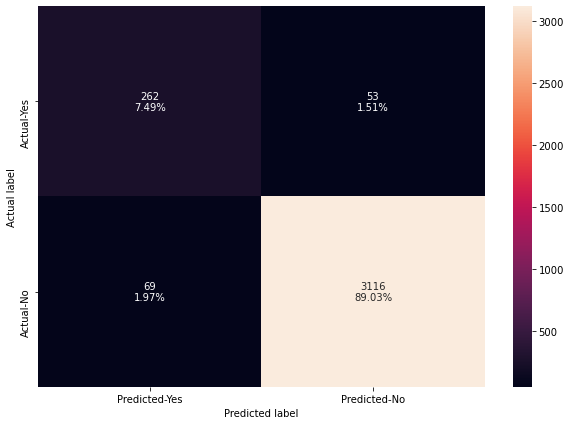

In [68]:
print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train )

### Prediction on Test Data 

confusion matrix = 



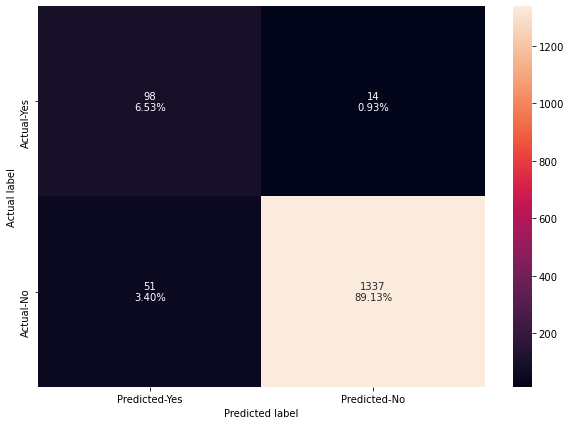

In [69]:
pred_ts = lg6.predict(X_test6)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_ts )

In [70]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9651428571428572
Accuracy on test data: 0.9566666666666667
Recall on train data: 0.7915407854984894
Recall on test data: 0.6577181208053692
Precision on train data: 0.8317460317460318
Precision on test data: 0.875
f1 score on train data: 0.8111455108359134
f1 score on test data: 0.7509578544061303


### AUC ROC Curve

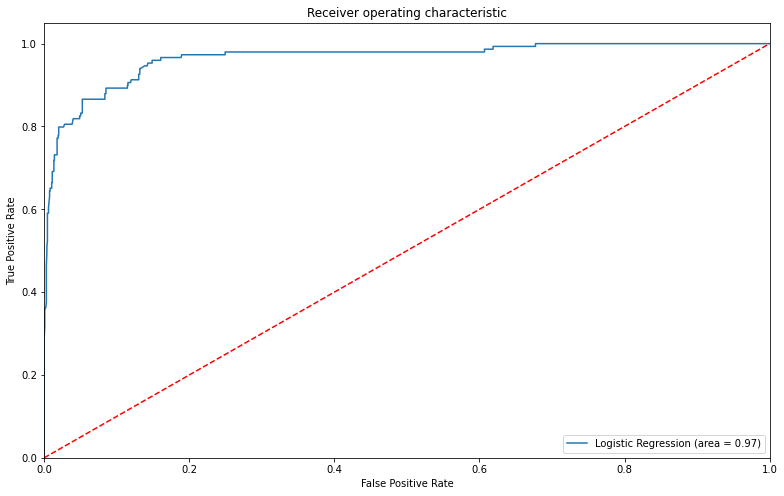

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(X_test6))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Choosing Optimal Threshold

In [72]:
pred_train = lg6.predict(X_train6)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.14490671987279932


In [73]:
target_names = ['Accepted Personal Loan', 'Rejected Personal Loan']
y_pred_tr = (lg6.predict(X_train6)>optimal_threshold).astype(int)
y_pred_ts = (lg6.predict(X_test6)>optimal_threshold).astype(int)

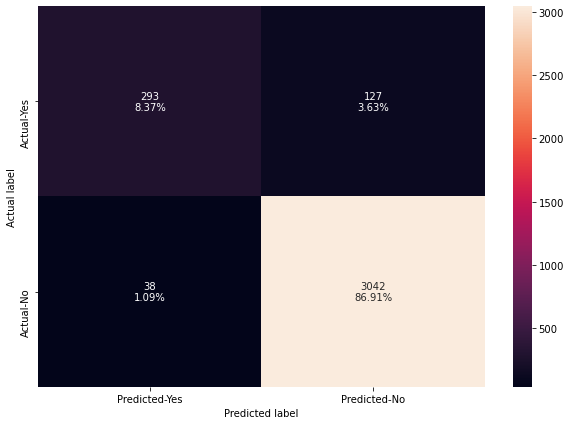

In [74]:
make_confusion_matrix(y_train,y_pred_tr )

In [75]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(y_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test,y_pred_ts))

Accuracy on train data: 0.9528571428571428
Accuracy on test data: 0.936


In [76]:
print('Recall on train data:',recall_score(y_train,y_pred_tr))
print('Recall on test data:',recall_score(y_test,y_pred_ts))

Recall on train data: 0.8851963746223565
Recall on test data: 0.8322147651006712


### Model Performance Evaluation-Insights and the Right Metrics

**Insights:**

**True Positives:**

Reality: A customer opted to take personal Loan.
Model predicted: The customer will take personal loan.
Outcome: The model is good.
    
**True Negatives**:

Reality: A customer opted out to take personal loan.
Model predicted: The customer will not take personal loan.
Outcome: The business is unaffected.
**False Positives** :

Reality: A customer opted out to take personal loan.
Model predicted: The customer will take personal loan.
Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be availing a personal loan.

**False Negatives**:

Reality: A customer opted to take personal Loan.
Model predicted: The customer will not take personal loan.
Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some offer to make the customer to avail the personal loan.


### **Right Metric to use:**
In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

**Observation**
* After choosing optimal threshold , true positives has increased from 6.53% to 8.37% while False Positive has decreased from 3.40% to 1.09%
* The accuracy on test data is 93.6% & Recall is 83.2% after removing multicollinearity and choosing optimal threshold. This is more reliable as multi collinearity has been removed from the data.
* AUC is 0.97

### Decision Tree Model Building

##  Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

Split Data

In [77]:
## Defining X and Y variables
X1 = df1.drop(['Personal_Loan'], axis=1)
y1 = df1[['Personal_Loan']]

#Convert categorical variables to dummy variables
X1 = pd.get_dummies(X1, drop_first=True)


In [78]:
feature_names = list(X1.columns)# Extracting independant features into variable feature_names
print(feature_names)

['ID', 'Age', 'Experience', 'ZIPCode', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'Income_category_Median_Income', 'Income_category_High_Income', 'CCAvg_category_Median_CCSpending', 'CCAvg_category_High_CCSpending']


In [79]:
# Splitting data into training and test set:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1, y1, test_size=0.3, random_state=1)
print(X1_train.shape, X1_test.shape)

(3500, 18) (1500, 18)


### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [80]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [81]:
model.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [82]:
def make_confusion_matrix(model,y1_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y1_actual : ground truth  
    
    '''
    y1_predict = model.predict(X1_test)
    cm=metrics.confusion_matrix( y1_actual, y1_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

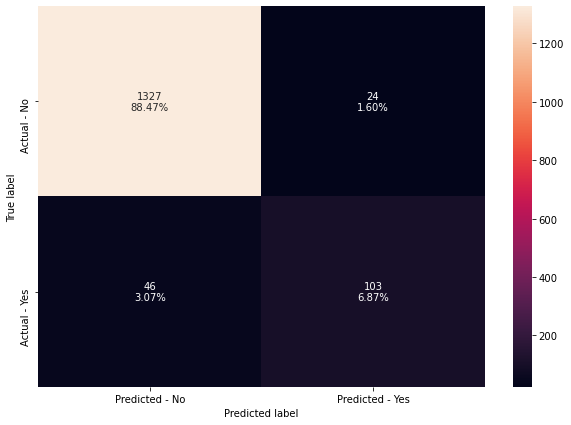

In [83]:
make_confusion_matrix(model,y1_test)

In [84]:
y1_train['Personal_Loan'].value_counts(1)

0   0.91
1   0.09
Name: Personal_Loan, dtype: float64

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 91% accuracy, hence accuracy is not a good metric to evaluate here.

In this case, not being able to identify a potential customer is the biggest loss we can face as we discussed earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

In [85]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred1_train = model.predict(X1_train)
    pred1_test = model.predict(X1_test)
    print("Recall on training set : ",metrics.recall_score(y1_train,pred1_train))
    print("Recall on test set : ",metrics.recall_score(y1_test,pred1_test))

In [86]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.6912751677852349


There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfitting.

### Visualizing the Decision Tree

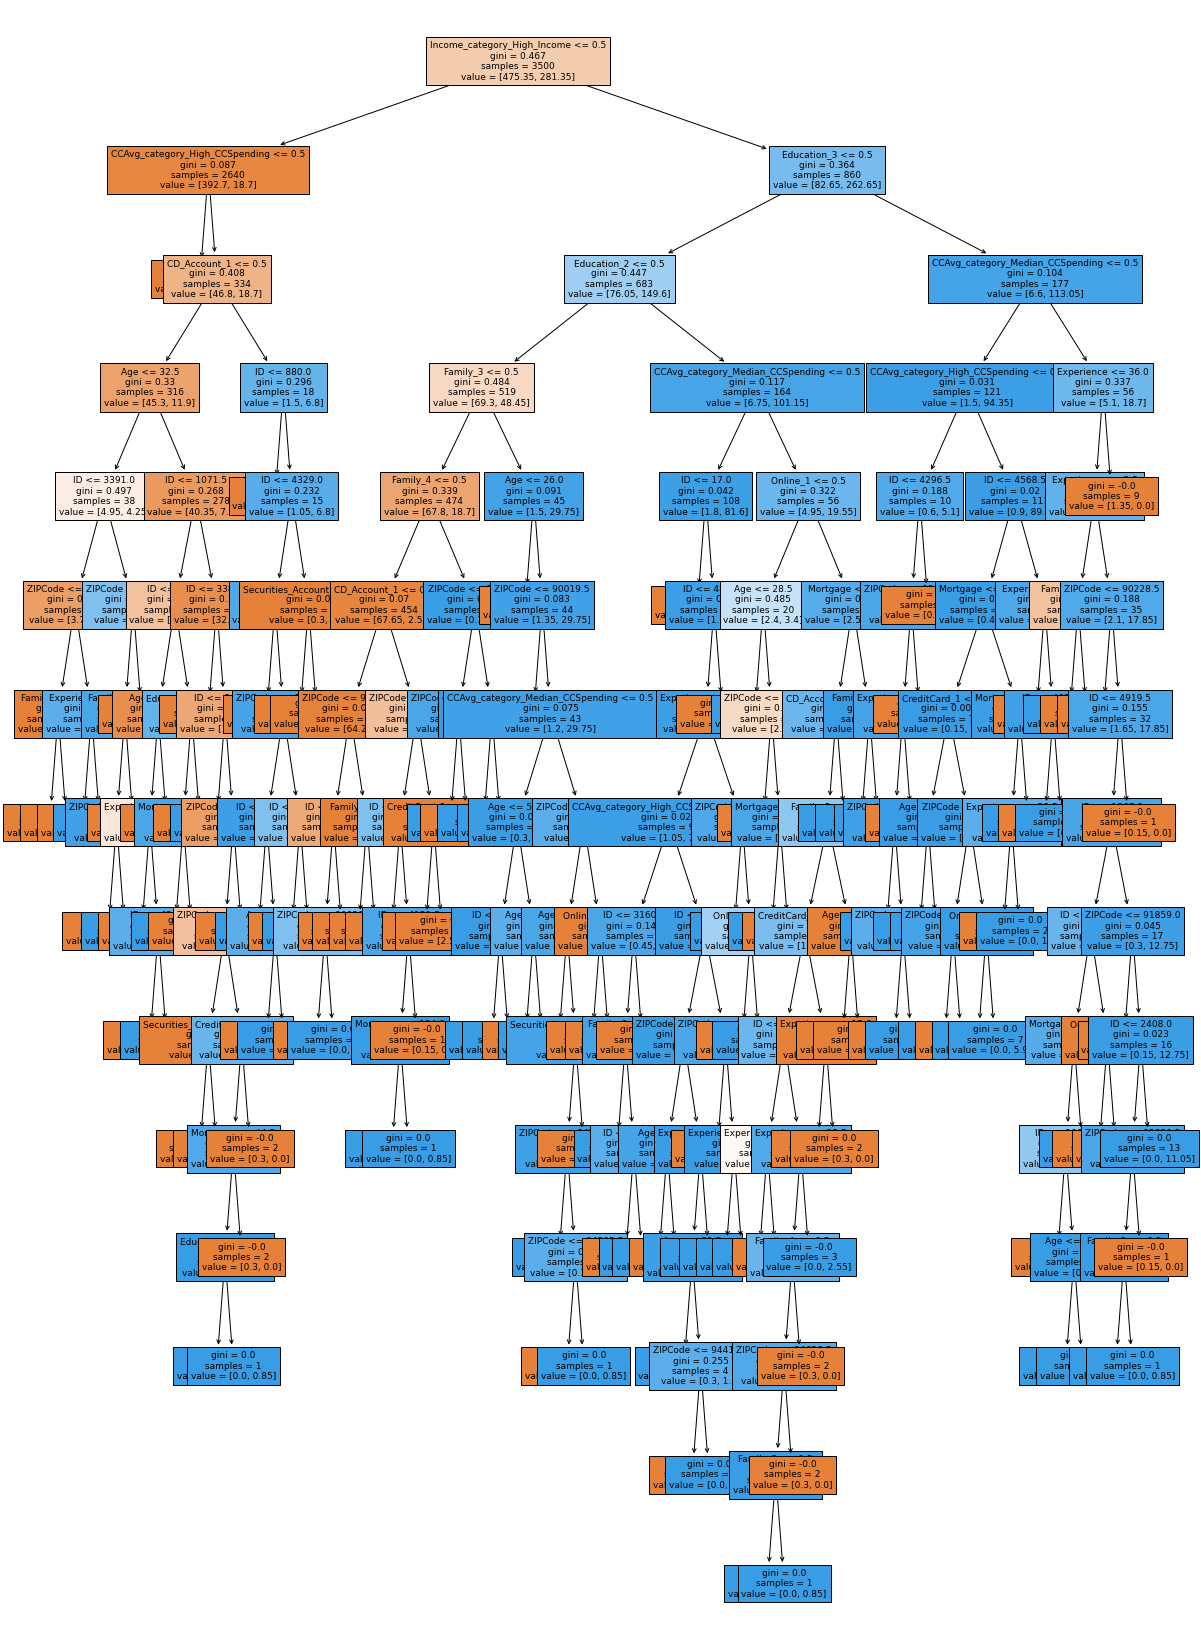

In [87]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [88]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income_category_High_Income <= 0.50
|   |--- CCAvg_category_High_CCSpending <= 0.50
|   |   |--- weights: [345.90, 0.00] class: 0
|   |--- CCAvg_category_High_CCSpending >  0.50
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Age <= 32.50
|   |   |   |   |--- ID <= 3391.00
|   |   |   |   |   |--- ZIPCode <= 95023.00
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- ZIPCode >  95023.00
|   |   |   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |--- ID >  3391.00
|   |   |   |   |   |--- ZIPCode <= 94269.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCode <= 90333.00
|   |

In [89]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X1_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Income_category_High_Income      0.54
Education_2                      0.09
Family_4                         0.07
Family_3                         0.07
ID                               0.04
ZIPCode                          0.04
Education_3                      0.04
CCAvg_category_High_CCSpending   0.03
CD_Account_1                     0.02
Experience                       0.02
Age                              0.01
CCAvg_category_Median_CCSpending 0.01
Mortgage                         0.01
Online_1                         0.00
CreditCard_1                     0.00
Securities_Account_1             0.00
Family_2                         0.00
Income_category_Median_Income    0.00


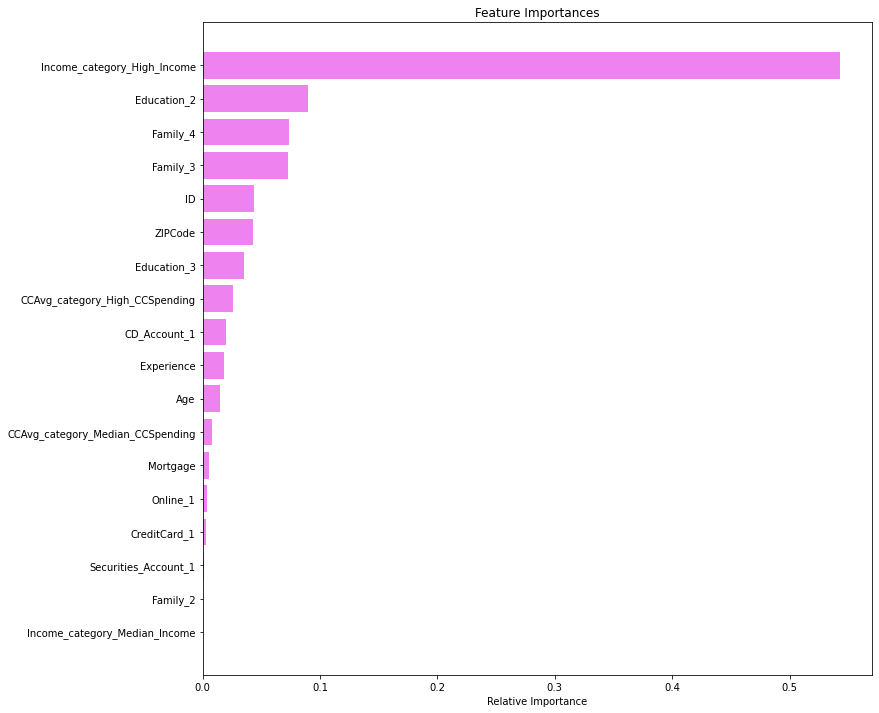

In [90]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, High_Income category is the most important variable for predicting if the customer will purchase Personal Loan .

**The tree above is very complex and difficult to interpret.**

### Reducing Overfitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X1_train, y1_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1, splitter='random')

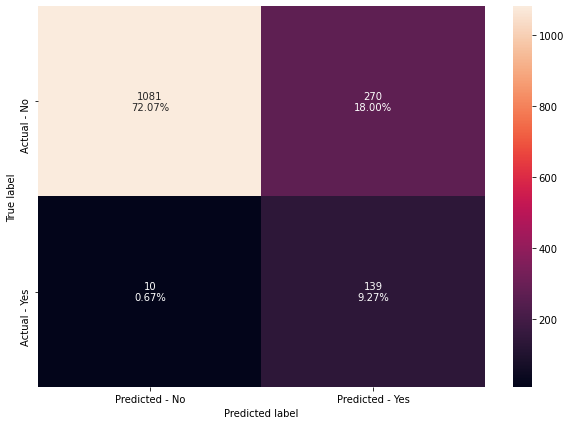

In [93]:
make_confusion_matrix(estimator,y1_test)

In [94]:
get_recall_score(estimator)

Recall on training set :  0.9577039274924471
Recall on test set :  0.9328859060402684


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

### Visualizing the Decision Tree

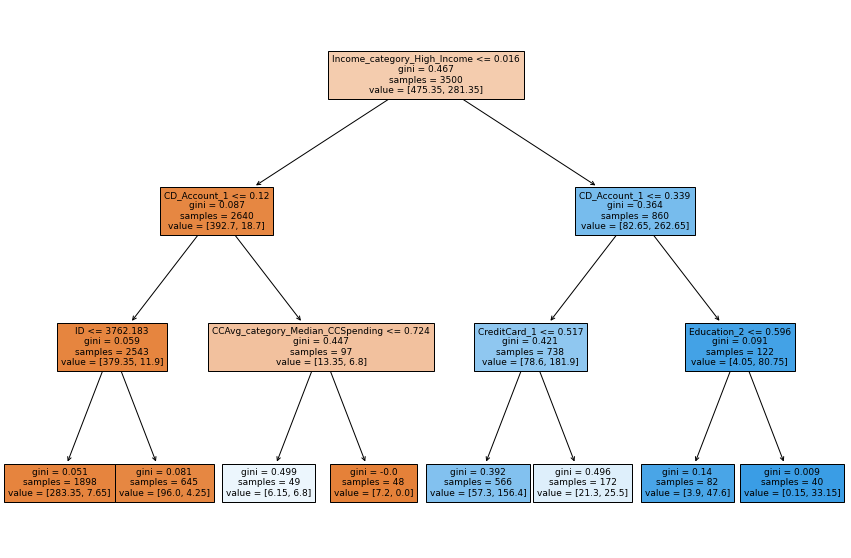

In [95]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [96]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income_category_High_Income <= 0.02
|   |--- CD_Account_1 <= 0.12
|   |   |--- ID <= 3762.18
|   |   |   |--- weights: [283.35, 7.65] class: 0
|   |   |--- ID >  3762.18
|   |   |   |--- weights: [96.00, 4.25] class: 0
|   |--- CD_Account_1 >  0.12
|   |   |--- CCAvg_category_Median_CCSpending <= 0.72
|   |   |   |--- weights: [6.15, 6.80] class: 1
|   |   |--- CCAvg_category_Median_CCSpending >  0.72
|   |   |   |--- weights: [7.20, 0.00] class: 0
|--- Income_category_High_Income >  0.02
|   |--- CD_Account_1 <= 0.34
|   |   |--- CreditCard_1 <= 0.52
|   |   |   |--- weights: [57.30, 156.40] class: 1
|   |   |--- CreditCard_1 >  0.52
|   |   |   |--- weights: [21.30, 25.50] class: 1
|   |--- CD_Account_1 >  0.34
|   |   |--- Education_2 <= 0.60
|   |   |   |--- weights: [3.90, 47.60] class: 1
|   |   |--- Education_2 >  0.60
|   |   |   |--- weights: [0.15, 33.15] class: 1



In [97]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X1_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                  Imp
Income_category_High_Income      0.92
CD_Account_1                     0.06
CreditCard_1                     0.01
CCAvg_category_Median_CCSpending 0.01
Education_2                      0.00
ID                               0.00
Securities_Account_1             0.00
Income_category_Median_Income    0.00
Online_1                         0.00
Education_3                      0.00
Age                              0.00
Family_4                         0.00
Family_3                         0.00
Family_2                         0.00
Mortgage                         0.00
ZIPCode                          0.00
Experience                       0.00
CCAvg_category_High_CCSpending   0.00


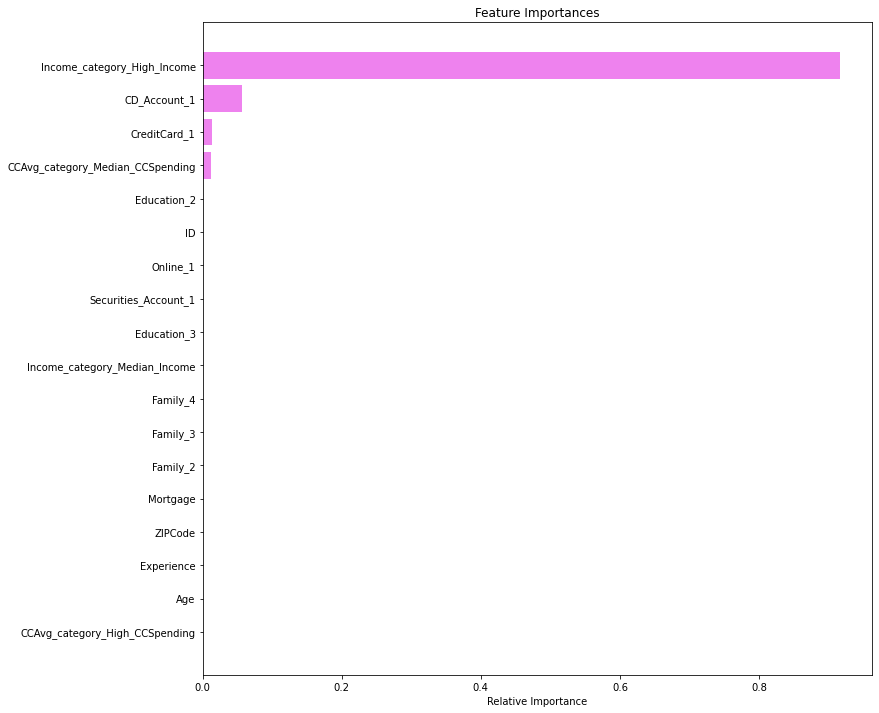

In [98]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [99]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [100]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,-0.00
1,0.00,-0.00
2,0.00,-0.00
3,0.00,-0.00
4,0.00,-0.00
...,...,...
65,0.00,0.07
66,0.01,0.08
67,0.01,0.09
68,0.03,0.21


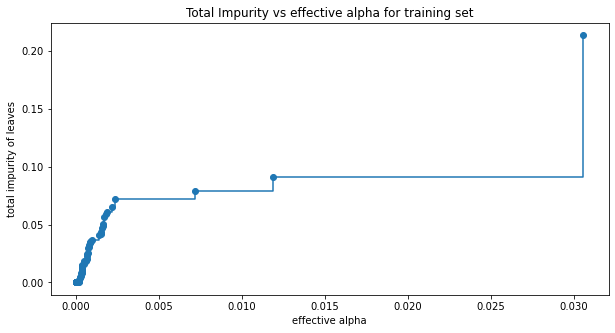

In [101]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X1_train, y1_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948089



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

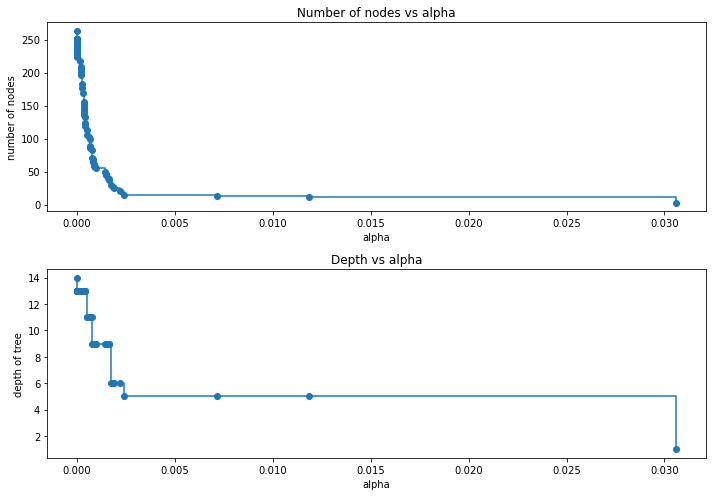

In [103]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [104]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X1_train)
    values_train=metrics.recall_score(y1_train,pred_train3)
    recall_train.append(values_train)

In [105]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X1_test)
    values_test=metrics.recall_score(y1_test,pred_test3)
    recall_test.append(values_test)

In [106]:
train_scores = [clf.score(X1_train, y1_train) for clf in clfs]
test_scores = [clf.score(X1_test, y1_test) for clf in clfs]

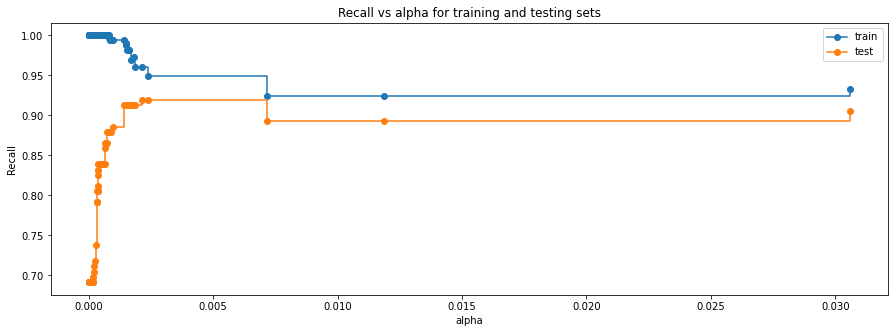

In [107]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.030 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

**Creating model with 0.002 ccp_alpha**

In [108]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

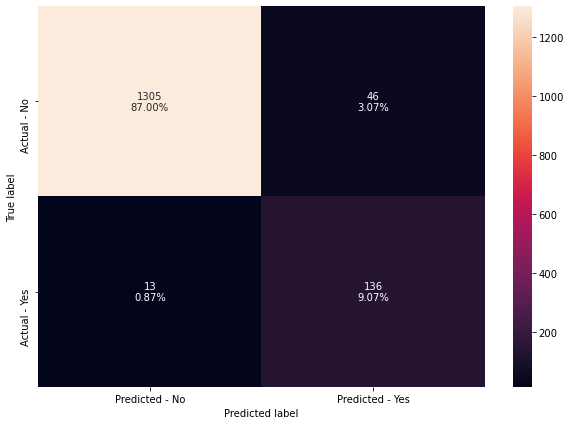

In [109]:
make_confusion_matrix(best_model,y1_test)

In [110]:
get_recall_score(best_model)

Recall on training set :  0.9607250755287009
Recall on test set :  0.912751677852349


Recall on test data is less than that from the hyperparameter tuned model

### Visualizing the Decision Tree

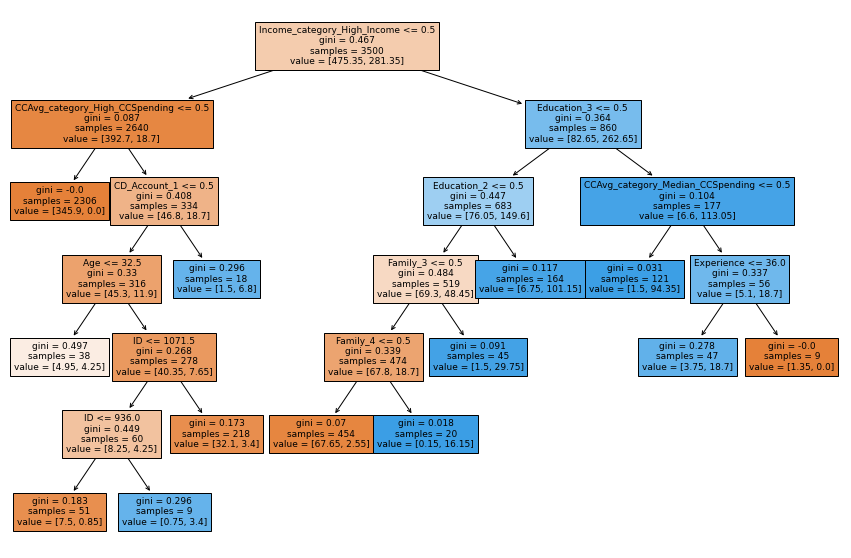

In [111]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [112]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income_category_High_Income <= 0.50
|   |--- CCAvg_category_High_CCSpending <= 0.50
|   |   |--- weights: [345.90, 0.00] class: 0
|   |--- CCAvg_category_High_CCSpending >  0.50
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Age <= 32.50
|   |   |   |   |--- weights: [4.95, 4.25] class: 0
|   |   |   |--- Age >  32.50
|   |   |   |   |--- ID <= 1071.50
|   |   |   |   |   |--- ID <= 936.00
|   |   |   |   |   |   |--- weights: [7.50, 0.85] class: 0
|   |   |   |   |   |--- ID >  936.00
|   |   |   |   |   |   |--- weights: [0.75, 3.40] class: 1
|   |   |   |   |--- ID >  1071.50
|   |   |   |   |   |--- weights: [32.10, 3.40] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [1.50, 6.80] class: 1
|--- Income_category_High_Income >  0.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0

In [113]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X1_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Income_category_High_Income      0.62
Education_2                      0.10
Family_3                         0.08
Family_4                         0.08
Education_3                      0.04
CCAvg_category_High_CCSpending   0.03
CD_Account_1                     0.02
ID                               0.01
Experience                       0.01
CCAvg_category_Median_CCSpending 0.00
Age                              0.00
Family_2                         0.00
Mortgage                         0.00
ZIPCode                          0.00
Securities_Account_1             0.00
Online_1                         0.00
CreditCard_1                     0.00
Income_category_Median_Income    0.00


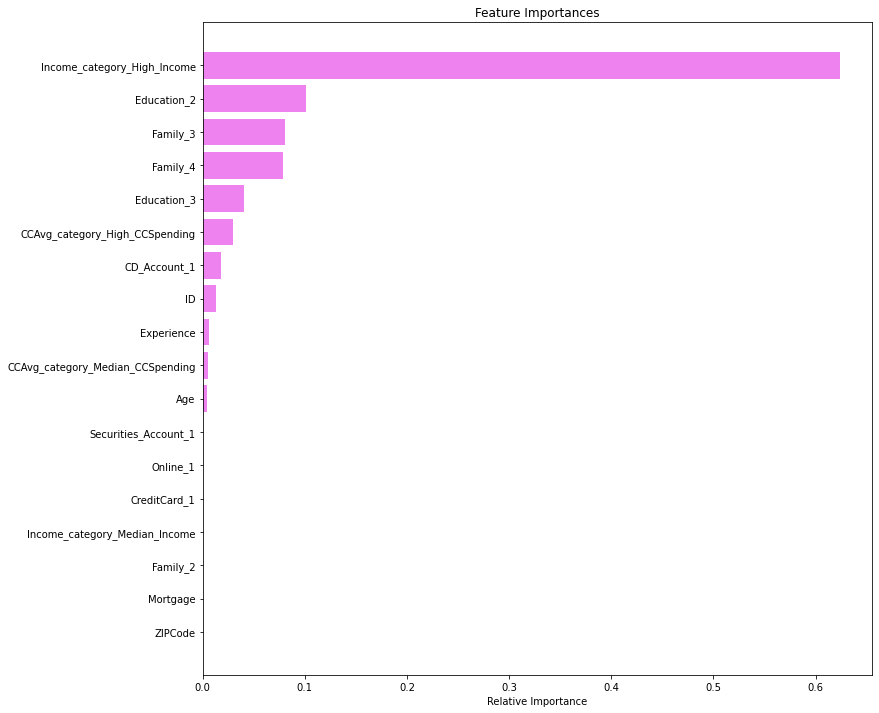

In [114]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**High Income and Customers with Graduate education are top 2 important features**

### Comparing all the models based on Model Performance

,Model,Train_Recall,Test_Recall
0,Logistic Regression,0.88,0.83
1,Initial decision tree model,1.00,0.69
2,Decision treee with hyperparameter tuning,0.95,0.93
3,Decision tree with post-pruning,0.96,0.91


**Decision tree model post pruning and prepruning has given us comparable best recall scores on data But based on the important features , decision tree model with post pruning is the one that matches closely with our Exploratory data analysis as well hence we will choose Decision Tree with post-pruning for our prediction.**

### Classification Report 

In [116]:
y1_pred = best_model.predict(X1_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1351
           1       0.75      0.91      0.82       149

    accuracy                           0.96      1500
   macro avg       0.87      0.94      0.90      1500
weighted avg       0.97      0.96      0.96      1500



### Model Performance Evaluation-Insights and the Right Metrics


Insights:

True Positives:

Reality: A customer opted to take personal Loan. Model predicted: The customer will take personal loan. Outcome: The model is good.

True Negatives:

Reality: A customer opted out to take personal loan. Model predicted: The customer will not take personal loan. Outcome: The business is unaffected. False Positives :

Reality: A customer opted out to take personal loan. Model predicted: The customer will take personal loan. Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be availing a personal loan.

False Negatives:

Reality: A customer opted to take personal Loan. Model predicted: The customer will not take personal loan. Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some offer to make the customer to avail the personal loan.

Right Metric to use:
In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

Observation

After Post Pruning , true negatives has increased from 6.87% to 9.07% while False Positive has decreased from 3.07% to .87%
The accuracy on test data is 97% & Recall is 91% after choosing optimal cc-alpha. 


### Misclassification Analysis

Let us now analyse the observations that has been correclty classfied as well as incorrectly classified by the model

Compare the actual output values for X1_test with the predicted values, execute the following script

In [118]:
y1_pred.shape

(1500,)

In [119]:
y1_test.shape

(1500, 1)

In [120]:
df2 = pd.DataFrame({'Actual Values': y1_test.values.flatten(),'Predicted Values':y1_pred.flatten()})
df2.head(25)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,0,0


### Analysis of Actual vs Predicted output

In [121]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Analysis of Actual Values

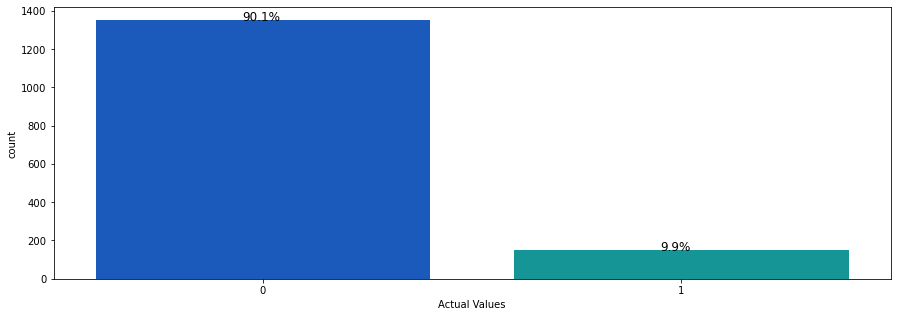

In [122]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Actual Values"],palette='winter')
perc_on_bar(ax,df2["Actual Values"])


#### Analysis of Predicted Values

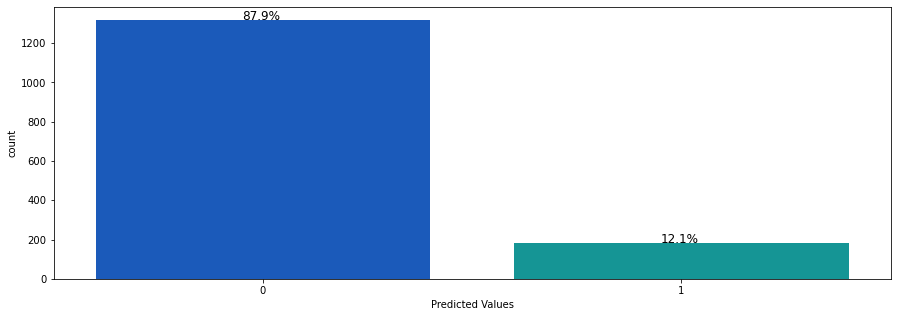

In [123]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df2["Predicted Values"],palette='winter')
perc_on_bar(ax,df2["Predicted Values"])


#### Analysis of Actual Value vs Predicted Value

In [124]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df2["Actual Values"],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df2["Actual Values"],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Actual Values        0    1   All
Predicted Values                 
0                 1305   13  1318
1                   46  136   182
All               1351  149  1500
------------------------------------------------------------------------------------------------------------------------


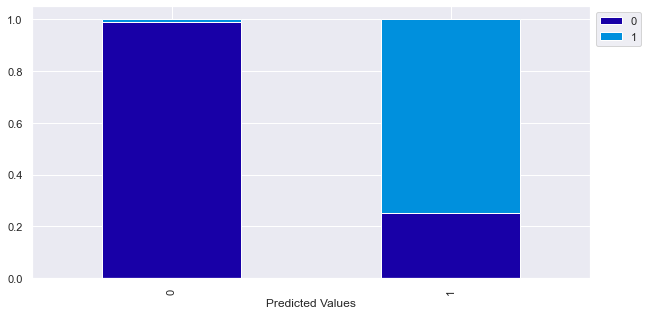

In [125]:
stacked_plot(df2['Predicted Values'])

We can see that the percentage of value predicted by our model has been very close to the actual values

### Conclusion

- We analyzed the Personal Loan campaign data using Exploratory Data Analysis and by using different models like Logistic Regression and Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to purchase a loan or not and thus the Bank can earn more through Interest on Loans.
- First We built a Logistic Regression model and analysed the model performance on the Recall criteria.Thorugh this model built we got to know that some of the important features for prediction was Income, CD_Account, Education, CCAvg, Family etc.We also analysed the AUC ROC curve for the model
- Next We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- High Income,Customers with graduate degree, customers having 3 family menmbers, high CCAvg spending are some of the most  important variables in predicting if the customers will purchase a personal loan. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* According to the decision tree model if a customer falls into a High Income category, there is high chance that the customer will avail Personal Loan when offered.
* Also customers who are graduates has a high chance of purchasing the Personal Loan.
* If the customer has family size of 3 members those should be targeted for offering Personal Loan and there are high chances that they will purchase the loan
* Also need to target customer who has high Avg CC spending .These customers also show a high chance of purchasing the personal loan when offered.
* Other customers who can be targeted that has a fairly good chance of purchasing the personal loan are customers who have Advanced/Professional degree, those who have a CD_Account and also customers who has 4 family memebers.
* Customer who does not show possibily of purchasing personal loans are those having medium to low income.
* Customer having small families like 1 or 2 members does not have much chance of purchasing personal loan.
* Also having an online or Credit Card is not contributing to the chances of purchasing personal loans